# mHSP2 Basins: Compare Cumulative Results

Compare cumulative water availability results between the two scenarios.

1. Historical Conditions
2. Development Scenario


## Imports and Parameters

In [1]:
%matplotlib inline

In [2]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pickle
import seaborn as sns
from copy import deepcopy

In [3]:
# to run if font not found
#import matplotlib.font_manager
#matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

In [4]:
# changes so Source Sans Pro used in plots and so fonts are not embedded as paths
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'SourceSansPro-Regular'

In [5]:
IN_DIR = r'C:\Users\nmart\OneDrive\CC_IRD\Process_Results'
SIM1_ROOT = "DCmH_WBTot_"
SIM2_ROOT = "DCmHBas_WBTot_"
XLH0_ROOT = "Cum_H0_%s_ProcessMonthly_Stats.xlsx"
XLH1_ROOT = "Cum_H1_%s_ProcessMonthly_Stats.xlsx"

In [6]:
OUT_DIR = r'C:\Users\nmart\Documents\CC_Plots'

In [7]:
MultAFtoM3 = 1233.48

In [8]:
ConvAFtoM3 = lambda af: af * MultAFtoM3

In [9]:
# time periods
TP_DICT = { 1 : [ dt.datetime(1981, 1, 1), dt.datetime(2010, 12, 31)],
            2 : [ dt.datetime(2011, 1, 1), dt.datetime(2040, 12, 31)],
            3 : [ dt.datetime(2041, 1, 1), dt.datetime(2070, 12, 31)],
            4 : [ dt.datetime(2071, 1, 1), dt.datetime(2100, 12, 31)],}

In [10]:
OurQs = np.array( [ round( 0.01 * x, 2 ) for x in range(101) ], dtype=np.float32 )
NumQs = len( OurQs )
NumQs

101

In [11]:
StatsHdsList = list()
for iI in range(NumQs):
    cQ = OurQs[iI]
    Hdr = "%d_ptile" % round(cQ * 100.0)
    StatsHdsList.append( Hdr )
# end of for
StatsHdsList.append( "Average" )
StatsHdsList.append( "Variance" )
StatsHdsList.append( "Skew" )
StatsHdsList.append( "Kurt" )

In [12]:
NumHdrs = len( StatsHdsList )
NumHdrs

105

In [13]:
RdHds = deepcopy( StatsHdsList )
RdHds.insert( 0, "Date" )

## Load from Spreadsheets

### Runoff

Climate change only scenario

In [14]:
InFile1 = os.path.normpath( os.path.join( IN_DIR, XLH1_ROOT % SIM1_ROOT ) )
CCROStats1 = pd.read_excel( InFile1, sheet_name="RO_1", header=0, names=RdHds, index_col=0,
                             parse_dates=True )
CCROStats1 = CCROStats1 * MultAFtoM3

In [15]:
CCMaxRO1 = CCROStats1[StatsHdsList[100]].max()
CCMinRO1 = CCROStats1[StatsHdsList[0]].min()
CCMaxRO1, CCMinRO1

(269544803.6320104, -74860.9864425659)

In [16]:
CCROStats2 = pd.read_excel( InFile1, sheet_name="RO_2", header=0, names=RdHds, index_col=0,
                             parse_dates=True )
CCROStats2 = CCROStats2 * MultAFtoM3

In [17]:
CCMaxRO2 = CCROStats2[StatsHdsList[100]].max()
CCMinRO2 = CCROStats2[StatsHdsList[0]].min()
CCMaxRO2, CCMinRO2

(421257144.0617109, -138043.4378485107)

In [18]:
CCROStats3 = pd.read_excel( InFile1, sheet_name="RO_3", header=0, names=RdHds, index_col=0,
                             parse_dates=True )
CCROStats3 = CCROStats3 * MultAFtoM3

In [19]:
CCMaxRO3 = CCROStats3[StatsHdsList[100]].max()
CCMinRO3 = CCROStats3[StatsHdsList[0]].min()
CCMaxRO3, CCMinRO3

(396092867.58980286, -144149.9929316711)

In [20]:
CCROStats4 = pd.read_excel( InFile1, sheet_name="RO_4", header=0, names=RdHds, index_col=0,
                             parse_dates=True )
CCROStats4 = CCROStats4 * MultAFtoM3

In [21]:
CCMaxRO4 = CCROStats4[StatsHdsList[100]].max()
CCMinRO4 = CCROStats4[StatsHdsList[0]].min()
CCMaxRO4, CCMinRO4

(450271272.9272284, -161520.98847976688)

In [22]:
CCMaxRO = max( CCMaxRO1, CCMaxRO2, CCMaxRO3, CCMaxRO4 )
CCMinRO = min( CCMinRO1, CCMinRO2, CCMinRO3, CCMinRO4 )
CCMaxRO, CCMinRO

(450271272.9272284, -161520.98847976688)

Combine into one time series

In [23]:
NumD1 = len( CCROStats1 )
NumP1 = len( CCROStats2 )
NumP2 = len( CCROStats3 )
NumP3 = len( CCROStats4 )
NumD1, NumP1, NumP2, NumP3

(360, 360, 360, 360)

In [24]:
IndexD1 = CCROStats1.index[NumD1-1]
IndexP1 = CCROStats2.index[NumP1-1]
IndexP2 = CCROStats3.index[NumP2-1]
IndexP3 = CCROStats4.index[NumP3-1]
IndexD1, IndexP1, IndexP2, IndexP3

(Timestamp('2010-12-01 00:00:00'),
 Timestamp('2040-12-01 00:00:00'),
 Timestamp('2070-12-01 00:00:00'),
 Timestamp('2100-12-01 00:00:00'))

Mean

In [25]:
CCROD1AveTot = CCROStats1.at[IndexD1, StatsHdsList[101]]
CCROP1AveTot = CCROStats2.at[IndexP1, StatsHdsList[101]] + CCROD1AveTot
CCROP2AveTot = CCROStats3.at[IndexP2, StatsHdsList[101]] + CCROP1AveTot
CCROP3AveTot = CCROStats4.at[IndexP3, StatsHdsList[101]] + CCROP2AveTot
CCROD1AveTot, CCROP1AveTot, CCROP2AveTot, CCROP3AveTot 

(92898584.91057797, 226443844.1170984, 371248553.845546, 527990291.95502865)

In [26]:
CCROAllAve = CCROStats1[[StatsHdsList[101]]].to_numpy()
CCROAllAve = np.append( CCROAllAve, 
                         CCROStats2[[StatsHdsList[101]]].to_numpy() + CCROD1AveTot )
CCROAllAve = np.append( CCROAllAve, 
                         CCROStats3[[StatsHdsList[101]]].to_numpy() + CCROP1AveTot )
CCROAllAve = np.append( CCROAllAve, 
                        CCROStats4[[StatsHdsList[101]]].to_numpy() + CCROP2AveTot )
len( CCROAllAve )

1440

Median

In [27]:
CCROD1MedTot = CCROStats1.at[IndexD1, StatsHdsList[50]]
CCROP1MedTot = CCROStats2.at[IndexP1, StatsHdsList[50]] + CCROD1MedTot
CCROP2MedTot = CCROStats3.at[IndexP2, StatsHdsList[50]] + CCROP1MedTot
CCROP3MedTot = CCROStats4.at[IndexP3, StatsHdsList[50]] + CCROP2MedTot
CCROD1MedTot, CCROP1MedTot, CCROP2MedTot, CCROP3MedTot 

(88981100.5098372, 216747237.27694494, 355532398.0508628, 506359539.0828929)

In [28]:
CCROAllMed = CCROStats1[[StatsHdsList[50]]].to_numpy()
CCROAllMed = np.append( CCROAllMed, 
                         CCROStats2[[StatsHdsList[50]]].to_numpy() + CCROD1MedTot )
CCROAllMed = np.append( CCROAllMed, 
                         CCROStats3[[StatsHdsList[50]]].to_numpy() + CCROP1MedTot )
CCROAllMed = np.append( CCROAllMed, 
                        CCROStats4[[StatsHdsList[50]]].to_numpy() + CCROP2MedTot )
len( CCROAllMed )

1440

25th percentile

In [29]:
CCROD1_25Tot = CCROStats1.at[IndexD1, StatsHdsList[25]]
CCROP1_25Tot = CCROStats2.at[IndexP1, StatsHdsList[25]] + CCROD1_25Tot
CCROP2_25Tot = CCROStats3.at[IndexP2, StatsHdsList[25]] + CCROP1_25Tot
CCROP3_25Tot = CCROStats4.at[IndexP3, StatsHdsList[25]] + CCROP2_25Tot
CCROD1_25Tot, CCROP1_25Tot, CCROP2_25Tot, CCROP3_25Tot 

(69073780.90428732, 166151139.59898704, 273883148.22589743, 391100387.6410928)

In [30]:
CCROAll_25 = CCROStats1[[StatsHdsList[25]]].to_numpy()
CCROAll_25 = np.append( CCROAll_25, 
                         CCROStats2[[StatsHdsList[25]]].to_numpy() + CCROD1_25Tot )
CCROAll_25 = np.append( CCROAll_25, 
                         CCROStats3[[StatsHdsList[25]]].to_numpy() + CCROP1_25Tot )
CCROAll_25 = np.append( CCROAll_25, 
                        CCROStats4[[StatsHdsList[25]]].to_numpy() + CCROP2_25Tot )
len( CCROAll_25 )

1440

75th percentile

In [31]:
CCROD1_75Tot = CCROStats1.at[IndexD1, StatsHdsList[75]]
CCROP1_75Tot = CCROStats2.at[IndexP1, StatsHdsList[75]] + CCROD1_75Tot
CCROP2_75Tot = CCROStats3.at[IndexP2, StatsHdsList[75]] + CCROP1_75Tot
CCROP3_75Tot = CCROStats4.at[IndexP3, StatsHdsList[75]] + CCROP2_75Tot
CCROD1_75Tot, CCROP1_75Tot, CCROP2_75Tot, CCROP3_75Tot 

(112440820.20436867, 275572529.258894, 451592392.7807518, 641700109.7036386)

In [32]:
CCROAll_75 = CCROStats1[[StatsHdsList[75]]].to_numpy()
CCROAll_75 = np.append( CCROAll_75, 
                         CCROStats2[[StatsHdsList[75]]].to_numpy() + CCROD1_75Tot )
CCROAll_75 = np.append( CCROAll_75, 
                         CCROStats3[[StatsHdsList[75]]].to_numpy() + CCROP1_75Tot )
CCROAll_75 = np.append( CCROAll_75, 
                        CCROStats4[[StatsHdsList[75]]].to_numpy() + CCROP2_75Tot )
len( CCROAll_75 )

1440

5th percentile

In [33]:
CCROD1_05Tot = CCROStats1.at[IndexD1, StatsHdsList[5]]
CCROP1_05Tot = CCROStats2.at[IndexP1, StatsHdsList[5]] + CCROD1_05Tot
CCROP2_05Tot = CCROStats3.at[IndexP2, StatsHdsList[5]] + CCROP1_05Tot
CCROP3_05Tot = CCROStats4.at[IndexP3, StatsHdsList[5]] + CCROP2_05Tot
CCROD1_05Tot, CCROP1_05Tot, CCROP2_05Tot, CCROP3_05Tot 

(45577139.76960605, 108372589.62346193, 178804528.06313258, 255663692.9763816)

In [34]:
CCROAll_05 = CCROStats1[[StatsHdsList[5]]].to_numpy()
CCROAll_05 = np.append( CCROAll_05, 
                         CCROStats2[[StatsHdsList[5]]].to_numpy() + CCROD1_05Tot )
CCROAll_05 = np.append( CCROAll_05, 
                         CCROStats3[[StatsHdsList[5]]].to_numpy() + CCROP1_05Tot )
CCROAll_05 = np.append( CCROAll_05, 
                        CCROStats4[[StatsHdsList[5]]].to_numpy() + CCROP2_05Tot )
len( CCROAll_05 )

1440

95th percentile

In [35]:
CCROD1_95Tot = CCROStats1.at[IndexD1, StatsHdsList[95]]
CCROP1_95Tot = CCROStats2.at[IndexP1, StatsHdsList[95]] + CCROD1_95Tot
CCROP2_95Tot = CCROStats3.at[IndexP2, StatsHdsList[95]] + CCROP1_95Tot
CCROP3_95Tot = CCROStats4.at[IndexP3, StatsHdsList[95]] + CCROP2_95Tot
CCROD1_95Tot, CCROP1_95Tot, CCROP2_95Tot, CCROP3_95Tot 

(152903638.78714526, 378044311.47311753, 618033075.0217937, 873310617.1947776)

In [36]:
CCROAll_95 = CCROStats1[[StatsHdsList[95]]].to_numpy()
CCROAll_95 = np.append( CCROAll_95, 
                         CCROStats2[[StatsHdsList[95]]].to_numpy() + CCROD1_95Tot )
CCROAll_95 = np.append( CCROAll_95, 
                         CCROStats3[[StatsHdsList[95]]].to_numpy() + CCROP1_95Tot )
CCROAll_95 = np.append( CCROAll_95, 
                        CCROStats4[[StatsHdsList[95]]].to_numpy() + CCROP2_95Tot )
len( CCROAll_95 )

1440

Basin change and climate change

In [37]:
InFile1 = os.path.normpath( os.path.join( IN_DIR, XLH1_ROOT % SIM2_ROOT ) )
BAROStats1 = pd.read_excel( InFile1, sheet_name="RO_1", header=0, names=RdHds, index_col=0,
                             parse_dates=True )
BAROStats1 = BAROStats1 * MultAFtoM3

In [38]:
BAMaxRO1 = BAROStats1[StatsHdsList[100]].max()
BAMinRO1 = BAROStats1[StatsHdsList[0]].min()
BAMaxRO1, BAMinRO1

(269544803.6320104, -74860.9864425659)

In [39]:
BAROStats2 = pd.read_excel( InFile1, sheet_name="RO_2", header=0, names=RdHds, index_col=0,
                             parse_dates=True )
BAROStats2 = BAROStats2 * MultAFtoM3

In [40]:
BAMaxRO2 = BAROStats2[StatsHdsList[100]].max()
BAMinRO2 = BAROStats2[StatsHdsList[0]].min()
BAMaxRO2, BAMinRO2

(511511873.624688, -95387.48332145691)

In [41]:
BAROStats3 = pd.read_excel( InFile1, sheet_name="RO_3", header=0, names=RdHds, index_col=0,
                             parse_dates=True )
BAROStats3 = BAROStats3 * MultAFtoM3

In [42]:
BAMaxRO3 = BAROStats3[StatsHdsList[100]].max()
BAMinRO3 = BAROStats3[StatsHdsList[0]].min()
BAMaxRO3, BAMinRO3

(657782282.6009294, -37486.3387007904)

In [43]:
BAROStats4 = pd.read_excel( InFile1, sheet_name="RO_4", header=0, names=RdHds, index_col=0,
                             parse_dates=True )
BAROStats4 = BAROStats4 * MultAFtoM3

In [44]:
BAMaxRO4 = BAROStats4[StatsHdsList[100]].max()
BAMinRO4 = BAROStats4[StatsHdsList[0]].min()
BAMaxRO4, BAMinRO4

(922120068.2467369, 2038.234133834839)

In [45]:
BAMaxRO = max( BAMaxRO1, BAMaxRO2, BAMaxRO3, BAMaxRO4 )
BAMinRO = min( BAMinRO1, BAMinRO2, BAMinRO3, BAMinRO4 )
BAMaxRO, BAMinRO

(922120068.2467369, -95387.48332145691)

Combine into one time series

Mean

In [46]:
BAROD1AveTot = BAROStats1.at[IndexD1, StatsHdsList[101]]
BAROP1AveTot = BAROStats2.at[IndexP1, StatsHdsList[101]] + BAROD1AveTot
BAROP2AveTot = BAROStats3.at[IndexP2, StatsHdsList[101]] + BAROP1AveTot
BAROP3AveTot = BAROStats4.at[IndexP3, StatsHdsList[101]] + BAROP2AveTot
BAROD1AveTot, BAROP1AveTot, BAROP2AveTot, BAROP3AveTot 

(92898584.91057797, 281459420.05896544, 601883157.4386872, 1095269067.827842)

In [47]:
BAROAllAve = BAROStats1[[StatsHdsList[101]]].to_numpy()
BAROAllAve = np.append( BAROAllAve, 
                         BAROStats2[[StatsHdsList[101]]].to_numpy() + BAROD1AveTot )
BAROAllAve = np.append( BAROAllAve, 
                         BAROStats3[[StatsHdsList[101]]].to_numpy() + BAROP1AveTot )
BAROAllAve = np.append( BAROAllAve, 
                        BAROStats4[[StatsHdsList[101]]].to_numpy() + BAROP2AveTot )
len( BAROAllAve )

1440

Median

In [48]:
BAROD1MedTot = BAROStats1.at[IndexD1, StatsHdsList[50]]
BAROP1MedTot = BAROStats2.at[IndexP1, StatsHdsList[50]] + BAROD1MedTot
BAROP2MedTot = BAROStats3.at[IndexP2, StatsHdsList[50]] + BAROP1MedTot
BAROP3MedTot = BAROStats4.at[IndexP3, StatsHdsList[50]] + BAROP2MedTot
BAROD1MedTot, BAROP1MedTot, BAROP2MedTot, BAROP3MedTot 

(88981100.5098372, 271348255.33560604, 585535930.9875293, 1073012276.6768527)

In [49]:
BAROAllMed = BAROStats1[[StatsHdsList[50]]].to_numpy()
BAROAllMed = np.append( BAROAllMed, 
                         BAROStats2[[StatsHdsList[50]]].to_numpy() + BAROD1MedTot )
BAROAllMed = np.append( BAROAllMed, 
                         BAROStats3[[StatsHdsList[50]]].to_numpy() + BAROP1MedTot )
BAROAllMed = np.append( BAROAllMed, 
                        BAROStats4[[StatsHdsList[50]]].to_numpy() + BAROP2MedTot )
len( BAROAllMed )

1440

25th percentile

In [50]:
BAROD1_25Tot = BAROStats1.at[IndexD1, StatsHdsList[25]]
BAROP1_25Tot = BAROStats2.at[IndexP1, StatsHdsList[25]] + BAROD1_25Tot
BAROP2_25Tot = BAROStats3.at[IndexP2, StatsHdsList[25]] + BAROP1_25Tot
BAROP3_25Tot = BAROStats4.at[IndexP3, StatsHdsList[25]] + BAROP2_25Tot
BAROD1_25Tot, BAROP1_25Tot, BAROP2_25Tot, BAROP3_25Tot 

(69073780.90428732, 213304493.19953334, 478986034.25190616, 904502471.3403426)

In [51]:
BAROAll_25 = BAROStats1[[StatsHdsList[25]]].to_numpy()
BAROAll_25 = np.append( BAROAll_25, 
                         BAROStats2[[StatsHdsList[25]]].to_numpy() + BAROD1_25Tot )
BAROAll_25 = np.append( BAROAll_25, 
                         BAROStats3[[StatsHdsList[25]]].to_numpy() + BAROP1_25Tot )
BAROAll_25 = np.append( BAROAll_25, 
                        BAROStats4[[StatsHdsList[25]]].to_numpy() + BAROP2_25Tot )
len( BAROAll_25 )

1440

75th percentile

In [52]:
BAROD1_75Tot = BAROStats1.at[IndexD1, StatsHdsList[75]]
BAROP1_75Tot = BAROStats2.at[IndexP1, StatsHdsList[75]] + BAROD1_75Tot
BAROP2_75Tot = BAROStats3.at[IndexP2, StatsHdsList[75]] + BAROP1_75Tot
BAROP3_75Tot = BAROStats4.at[IndexP3, StatsHdsList[75]] + BAROP2_75Tot
BAROD1_75Tot, BAROP1_75Tot, BAROP2_75Tot, BAROP3_75Tot 

(112440820.20436867, 338090860.1220464, 707493455.5585384, 1262774770.0527616)

In [53]:
BAROAll_75 = BAROStats1[[StatsHdsList[75]]].to_numpy()
BAROAll_75 = np.append( BAROAll_75, 
                         BAROStats2[[StatsHdsList[75]]].to_numpy() + BAROD1_75Tot )
BAROAll_75 = np.append( BAROAll_75, 
                         BAROStats3[[StatsHdsList[75]]].to_numpy() + BAROP1_75Tot )
BAROAll_75 = np.append( BAROAll_75, 
                        BAROStats4[[StatsHdsList[75]]].to_numpy() + BAROP2_75Tot )
len( BAROAll_75 )

1440

5th percentile

In [54]:
BAROD1_05Tot = BAROStats1.at[IndexD1, StatsHdsList[5]]
BAROP1_05Tot = BAROStats2.at[IndexP1, StatsHdsList[5]] + BAROD1_05Tot
BAROP2_05Tot = BAROStats3.at[IndexP2, StatsHdsList[5]] + BAROP1_05Tot
BAROP3_05Tot = BAROStats4.at[IndexP3, StatsHdsList[5]] + BAROP2_05Tot
BAROD1_05Tot, BAROP1_05Tot, BAROP2_05Tot, BAROP3_05Tot 

(45577139.76960605, 144540165.59956962, 347360023.6169905, 695210616.6570514)

In [55]:
BAROAll_05 = BAROStats1[[StatsHdsList[5]]].to_numpy()
BAROAll_05 = np.append( BAROAll_05, 
                         BAROStats2[[StatsHdsList[5]]].to_numpy() + BAROD1_05Tot )
BAROAll_05 = np.append( BAROAll_05, 
                         BAROStats3[[StatsHdsList[5]]].to_numpy() + BAROP1_05Tot )
BAROAll_05 = np.append( BAROAll_05, 
                        BAROStats4[[StatsHdsList[5]]].to_numpy() + BAROP2_05Tot )
len( BAROAll_05 )

1440

95th percentile

In [56]:
BAROD1_95Tot = BAROStats1.at[IndexD1, StatsHdsList[95]]
BAROP1_95Tot = BAROStats2.at[IndexP1, StatsHdsList[95]] + BAROD1_95Tot
BAROP2_95Tot = BAROStats3.at[IndexP2, StatsHdsList[95]] + BAROP1_95Tot
BAROP3_95Tot = BAROStats4.at[IndexP3, StatsHdsList[95]] + BAROP2_95Tot
BAROD1_95Tot, BAROP1_95Tot, BAROP2_95Tot, BAROP3_95Tot 

(152903638.78714526, 453362690.77588385, 913234158.433955, 1574371848.7008853)

In [57]:
BAROAll_95 = BAROStats1[[StatsHdsList[95]]].to_numpy()
BAROAll_95 = np.append( BAROAll_95, 
                         BAROStats2[[StatsHdsList[95]]].to_numpy() + BAROD1_95Tot )
BAROAll_95 = np.append( BAROAll_95, 
                         BAROStats3[[StatsHdsList[95]]].to_numpy() + BAROP1_95Tot )
BAROAll_95 = np.append( BAROAll_95, 
                        BAROStats4[[StatsHdsList[95]]].to_numpy() + BAROP2_95Tot )
len( BAROAll_95 )

1440

### Recharge

Climate change only scenario

In [58]:
InFile1 = os.path.normpath( os.path.join( IN_DIR, XLH1_ROOT % SIM1_ROOT ) )
CCREStats1 = pd.read_excel( InFile1, sheet_name="RE_1", header=0, names=RdHds, index_col=0,
                             parse_dates=True )
CCREStats1 = CCREStats1 * MultAFtoM3

In [59]:
CCMaxRE1 = CCREStats1[StatsHdsList[100]].max()
CCMinRE1 = CCREStats1[StatsHdsList[0]].min()
CCMaxRE1, CCMinRE1

(2188244400.1441965, 26246.265175992656)

In [60]:
CCREStats2 = pd.read_excel( InFile1, sheet_name="RE_2", header=0, names=RdHds, index_col=0,
                             parse_dates=True )
CCREStats2 = CCREStats2 * MultAFtoM3

In [61]:
CCMaxRE2 = CCREStats2[StatsHdsList[100]].max()
CCMinRE2 = CCREStats2[StatsHdsList[0]].min()
CCMaxRE2, CCMinRE2

(2569825452.892242, 16000.60597513497)

In [62]:
CCREStats3 = pd.read_excel( InFile1, sheet_name="RE_3", header=0, names=RdHds, index_col=0,
                             parse_dates=True )
CCREStats3 = CCREStats3 * MultAFtoM3

In [63]:
CCMaxRE3 = CCREStats3[StatsHdsList[100]].max()
CCMinRE3 = CCREStats3[StatsHdsList[0]].min()
CCMaxRE3, CCMinRE3

(2668330981.6237035, 8804.822749802024)

In [64]:
CCREStats4 = pd.read_excel( InFile1, sheet_name="RE_4", header=0, names=RdHds, index_col=0,
                             parse_dates=True )
CCREStats4 = CCREStats4 * MultAFtoM3

In [65]:
CCMaxRE4 = CCREStats4[StatsHdsList[100]].max()
CCMinRE4 = CCREStats4[StatsHdsList[0]].min()
CCMaxRE4, CCMinRE4

(2650569845.390138, 5848.667067044377)

In [66]:
CCMaxRE = max( CCMaxRE1, CCMaxRE2, CCMaxRE3, CCMaxRE4 )
CCMinRE = min( CCMinRE1, CCMinRE2, CCMinRE3, CCMinRE4 )
CCMaxRE, CCMinRE

(2668330981.6237035, 5848.667067044377)

Combine into one time series

Mean

In [67]:
CCRED1AveTot = CCREStats1.at[IndexD1, StatsHdsList[101]]
CCREP1AveTot = CCREStats2.at[IndexP1, StatsHdsList[101]] + CCRED1AveTot
CCREP2AveTot = CCREStats3.at[IndexP2, StatsHdsList[101]] + CCREP1AveTot
CCREP3AveTot = CCREStats4.at[IndexP3, StatsHdsList[101]] + CCREP2AveTot
CCRED1AveTot, CCREP1AveTot, CCREP2AveTot, CCREP3AveTot 

(1528397000.0521052, 3258915908.8016434, 5041890555.89952, 6855043086.24184)

In [68]:
CCREAllAve = CCREStats1[[StatsHdsList[101]]].to_numpy()
CCREAllAve = np.append( CCREAllAve, 
                         CCREStats2[[StatsHdsList[101]]].to_numpy() + CCRED1AveTot )
CCREAllAve = np.append( CCREAllAve, 
                         CCREStats3[[StatsHdsList[101]]].to_numpy() + CCREP1AveTot )
CCREAllAve = np.append( CCREAllAve, 
                        CCREStats4[[StatsHdsList[101]]].to_numpy() + CCREP2AveTot )
len( CCREAllAve )

1440

Median

In [69]:
CCRED1MedTot = CCREStats1.at[IndexD1, StatsHdsList[50]]
CCREP1MedTot = CCREStats2.at[IndexP1, StatsHdsList[50]] + CCRED1MedTot
CCREP2MedTot = CCREStats3.at[IndexP2, StatsHdsList[50]] + CCREP1MedTot
CCREP3MedTot = CCREStats4.at[IndexP3, StatsHdsList[50]] + CCREP2MedTot
CCRED1MedTot, CCREP1MedTot, CCREP2MedTot, CCREP3MedTot 

(1523339378.9228032, 3245243300.150854, 5023941670.956094, 6831380782.0771885)

In [70]:
CCREAllMed = CCREStats1[[StatsHdsList[50]]].to_numpy()
CCREAllMed = np.append( CCREAllMed, 
                         CCREStats2[[StatsHdsList[50]]].to_numpy() + CCRED1MedTot )
CCREAllMed = np.append( CCREAllMed, 
                         CCREStats3[[StatsHdsList[50]]].to_numpy() + CCREP1MedTot )
CCREAllMed = np.append( CCREAllMed, 
                        CCREStats4[[StatsHdsList[50]]].to_numpy() + CCREP2MedTot )
len( CCREAllMed )

1440

25th percentile

In [71]:
CCRED1_25Tot = CCREStats1.at[IndexD1, StatsHdsList[25]]
CCREP1_25Tot = CCREStats2.at[IndexP1, StatsHdsList[25]] + CCRED1_25Tot
CCREP2_25Tot = CCREStats3.at[IndexP2, StatsHdsList[25]] + CCREP1_25Tot
CCREP3_25Tot = CCREStats4.at[IndexP3, StatsHdsList[25]] + CCREP2_25Tot
CCRED1_25Tot, CCREP1_25Tot, CCREP2_25Tot, CCREP3_25Tot 

(1415713429.146991, 3001879017.3207884, 4641117081.560384, 6303526684.013209)

In [72]:
CCREAll_25 = CCREStats1[[StatsHdsList[25]]].to_numpy()
CCREAll_25 = np.append( CCREAll_25, 
                         CCREStats2[[StatsHdsList[25]]].to_numpy() + CCRED1_25Tot )
CCREAll_25 = np.append( CCREAll_25, 
                         CCREStats3[[StatsHdsList[25]]].to_numpy() + CCREP1_25Tot )
CCREAll_25 = np.append( CCREAll_25, 
                        CCREStats4[[StatsHdsList[25]]].to_numpy() + CCREP2_25Tot )
len( CCREAll_25 )

1440

75th percentile

In [73]:
CCRED1_75Tot = CCREStats1.at[IndexD1, StatsHdsList[75]]
CCREP1_75Tot = CCREStats2.at[IndexP1, StatsHdsList[75]] + CCRED1_75Tot
CCREP2_75Tot = CCREStats3.at[IndexP2, StatsHdsList[75]] + CCREP1_75Tot
CCREP3_75Tot = CCREStats4.at[IndexP3, StatsHdsList[75]] + CCREP2_75Tot
CCRED1_75Tot, CCREP1_75Tot, CCREP2_75Tot, CCREP3_75Tot 

(1635659810.0766609, 3501144841.9525137, 5422301076.155542, 7377502945.442777)

In [74]:
CCREAll_75 = CCREStats1[[StatsHdsList[75]]].to_numpy()
CCREAll_75 = np.append( CCREAll_75, 
                         CCREStats2[[StatsHdsList[75]]].to_numpy() + CCRED1_75Tot )
CCREAll_75 = np.append( CCREAll_75, 
                         CCREStats3[[StatsHdsList[75]]].to_numpy() + CCREP1_75Tot )
CCREAll_75 = np.append( CCREAll_75, 
                        CCREStats4[[StatsHdsList[75]]].to_numpy() + CCREP2_75Tot )
len( CCREAll_75 )

1440

5th percentile

In [75]:
CCRED1_05Tot = CCREStats1.at[IndexD1, StatsHdsList[5]]
CCREP1_05Tot = CCREStats2.at[IndexP1, StatsHdsList[5]] + CCRED1_05Tot
CCREP2_05Tot = CCREStats3.at[IndexP2, StatsHdsList[5]] + CCREP1_05Tot
CCREP3_05Tot = CCREStats4.at[IndexP3, StatsHdsList[5]] + CCREP2_05Tot
CCRED1_05Tot, CCREP1_05Tot, CCREP2_05Tot, CCREP3_05Tot 

(1266217408.3974273, 2665657728.706725, 4107493418.4343014, 5577970239.437261)

In [76]:
CCREAll_05 = CCREStats1[[StatsHdsList[5]]].to_numpy()
CCREAll_05 = np.append( CCREAll_05, 
                         CCREStats2[[StatsHdsList[5]]].to_numpy() + CCRED1_05Tot )
CCREAll_05 = np.append( CCREAll_05, 
                         CCREStats3[[StatsHdsList[5]]].to_numpy() + CCREP1_05Tot )
CCREAll_05 = np.append( CCREAll_05, 
                        CCREStats4[[StatsHdsList[5]]].to_numpy() + CCREP2_05Tot )
len( CCREAll_05 )

1440

95th percentile

In [77]:
CCRED1_95Tot = CCREStats1.at[IndexD1, StatsHdsList[95]]
CCREP1_95Tot = CCREStats2.at[IndexP1, StatsHdsList[95]] + CCRED1_95Tot
CCREP2_95Tot = CCREStats3.at[IndexP2, StatsHdsList[95]] + CCREP1_95Tot
CCREP3_95Tot = CCREStats4.at[IndexP3, StatsHdsList[95]] + CCREP2_95Tot
CCRED1_95Tot, CCREP1_95Tot, CCREP2_95Tot, CCREP3_95Tot 

(1809666864.4927077, 3895469743.6886663, 6037501851.229574, 8218055814.154311)

In [78]:
CCREAll_95 = CCREStats1[[StatsHdsList[95]]].to_numpy()
CCREAll_95 = np.append( CCREAll_95, 
                         CCREStats2[[StatsHdsList[95]]].to_numpy() + CCRED1_95Tot )
CCREAll_95 = np.append( CCREAll_95, 
                         CCREStats3[[StatsHdsList[95]]].to_numpy() + CCREP1_95Tot )
CCREAll_95 = np.append( CCREAll_95, 
                        CCREStats4[[StatsHdsList[95]]].to_numpy() + CCREP2_95Tot )
len( CCREAll_95 )

1440

Basin change and climate change

In [79]:
InFile1 = os.path.normpath( os.path.join( IN_DIR, XLH1_ROOT % SIM2_ROOT ) )
BAREStats1 = pd.read_excel( InFile1, sheet_name="RE_1", header=0, names=RdHds, index_col=0,
                             parse_dates=True )
BAREStats1 = BAREStats1 * MultAFtoM3

In [80]:
BAMaxRE1 = BAREStats1[StatsHdsList[100]].max()
BAMinRE1 = BAREStats1[StatsHdsList[0]].min()
BAMaxRE1, BAMinRE1

(2188244563.518059, 26246.26517599373)

In [81]:
BAREStats2 = pd.read_excel( InFile1, sheet_name="RE_2", header=0, names=RdHds, index_col=0,
                             parse_dates=True )
BAREStats2 = BAREStats2 * MultAFtoM3

In [82]:
BAMaxRE2 = BAREStats2[StatsHdsList[100]].max()
BAMinRE2 = BAREStats2[StatsHdsList[0]].min()
BAMaxRE2, BAMinRE2

(2557344175.434997, 16407.305064816173)

In [83]:
BAREStats3 = pd.read_excel( InFile1, sheet_name="RE_3", header=0, names=RdHds, index_col=0,
                             parse_dates=True )
BAREStats3 = BAREStats3 * MultAFtoM3

In [84]:
BAMaxRE3 = BAREStats3[StatsHdsList[100]].max()
BAMinRE3 = BAREStats3[StatsHdsList[0]].min()
BAMaxRE3, BAMinRE3

(2562891928.1223288, 54900.621622825005)

In [85]:
BAREStats4 = pd.read_excel( InFile1, sheet_name="RE_4", header=0, names=RdHds, index_col=0,
                             parse_dates=True )
BAREStats4 = BAREStats4 * MultAFtoM3

In [86]:
BAMaxRE4 = BAREStats4[StatsHdsList[100]].max()
BAMinRE4 = BAREStats4[StatsHdsList[0]].min()
BAMaxRE4, BAMinRE4

(2480194566.474789, 70803.87959878206)

In [87]:
BAMaxRE = max( BAMaxRE1, BAMaxRE2, BAMaxRE3, BAMaxRE4 )
BAMinRE = min( BAMinRE1, BAMinRE2, BAMinRE3, BAMinRE4 )
BAMaxRE, BAMinRE

(2562891928.1223288, 16407.305064816173)

Combine into one time series

Mean

In [88]:
BARED1AveTot = BAREStats1.at[IndexD1, StatsHdsList[101]]
BAREP1AveTot = BAREStats2.at[IndexP1, StatsHdsList[101]] + BARED1AveTot
BAREP2AveTot = BAREStats3.at[IndexP2, StatsHdsList[101]] + BAREP1AveTot
BAREP3AveTot = BAREStats4.at[IndexP3, StatsHdsList[101]] + BAREP2AveTot
BARED1AveTot, BAREP1AveTot, BAREP2AveTot, BAREP3AveTot 

(1528397115.8754616, 3281833480.0459795, 5061200235.63329, 6812971632.18348)

In [89]:
BAREAllAve = BAREStats1[[StatsHdsList[101]]].to_numpy()
BAREAllAve = np.append( BAREAllAve, 
                         BAREStats2[[StatsHdsList[101]]].to_numpy() + BARED1AveTot )
BAREAllAve = np.append( BAREAllAve, 
                         BAREStats3[[StatsHdsList[101]]].to_numpy() + BAREP1AveTot )
BAREAllAve = np.append( BAREAllAve, 
                        BAREStats4[[StatsHdsList[101]]].to_numpy() + BAREP2AveTot )
len( BAREAllAve )

1440

Median

In [90]:
BARED1MedTot = BAREStats1.at[IndexD1, StatsHdsList[50]]
BAREP1MedTot = BAREStats2.at[IndexP1, StatsHdsList[50]] + BARED1MedTot
BAREP2MedTot = BAREStats3.at[IndexP2, StatsHdsList[50]] + BAREP1MedTot
BAREP3MedTot = BAREStats4.at[IndexP3, StatsHdsList[50]] + BAREP2MedTot
BARED1MedTot, BAREP1MedTot, BAREP2MedTot, BAREP3MedTot 

(1523339494.0616457, 3268884120.609581, 5044494132.522225, 6791743759.008865)

In [91]:
BAREAllMed = BAREStats1[[StatsHdsList[50]]].to_numpy()
BAREAllMed = np.append( BAREAllMed, 
                         BAREStats2[[StatsHdsList[50]]].to_numpy() + BARED1MedTot )
BAREAllMed = np.append( BAREAllMed, 
                         BAREStats3[[StatsHdsList[50]]].to_numpy() + BAREP1MedTot )
BAREAllMed = np.append( BAREAllMed, 
                        BAREStats4[[StatsHdsList[50]]].to_numpy() + BAREP2MedTot )
len( BAREAllMed )

1440

25th percentile

In [92]:
BARED1_25Tot = BAREStats1.at[IndexD1, StatsHdsList[25]]
BAREP1_25Tot = BAREStats2.at[IndexP1, StatsHdsList[25]] + BARED1_25Tot
BAREP2_25Tot = BAREStats3.at[IndexP2, StatsHdsList[25]] + BAREP1_25Tot
BAREP3_25Tot = BAREStats4.at[IndexP3, StatsHdsList[25]] + BAREP2_25Tot
BARED1_25Tot, BAREP1_25Tot, BAREP2_25Tot, BAREP3_25Tot 

(1415713537.093398, 3031503092.2865486, 4682172335.105953, 6308581868.291857)

In [93]:
BAREAll_25 = BAREStats1[[StatsHdsList[25]]].to_numpy()
BAREAll_25 = np.append( BAREAll_25, 
                         BAREStats2[[StatsHdsList[25]]].to_numpy() + BARED1_25Tot )
BAREAll_25 = np.append( BAREAll_25, 
                         BAREStats3[[StatsHdsList[25]]].to_numpy() + BAREP1_25Tot )
BAREAll_25 = np.append( BAREAll_25, 
                        BAREStats4[[StatsHdsList[25]]].to_numpy() + BAREP2_25Tot )
len( BAREAll_25 )

1440

75th percentile

In [94]:
BARED1_75Tot = BAREStats1.at[IndexD1, StatsHdsList[75]]
BAREP1_75Tot = BAREStats2.at[IndexP1, StatsHdsList[75]] + BARED1_75Tot
BAREP2_75Tot = BAREStats3.at[IndexP2, StatsHdsList[75]] + BAREP1_75Tot
BAREP3_75Tot = BAREStats4.at[IndexP3, StatsHdsList[75]] + BAREP2_75Tot
BARED1_75Tot, BAREP1_75Tot, BAREP2_75Tot, BAREP3_75Tot 

(1635659934.2506864, 3518018440.013457, 5421448194.171625, 7292555492.545921)

In [95]:
BAREAll_75 = BAREStats1[[StatsHdsList[75]]].to_numpy()
BAREAll_75 = np.append( BAREAll_75, 
                         BAREStats2[[StatsHdsList[75]]].to_numpy() + BARED1_75Tot )
BAREAll_75 = np.append( BAREAll_75, 
                         BAREStats3[[StatsHdsList[75]]].to_numpy() + BAREP1_75Tot )
BAREAll_75 = np.append( BAREAll_75, 
                        BAREStats4[[StatsHdsList[75]]].to_numpy() + BAREP2_75Tot )
len( BAREAll_75 )

1440

5th percentile

In [96]:
BARED1_05Tot = BAREStats1.at[IndexD1, StatsHdsList[5]]
BAREP1_05Tot = BAREStats2.at[IndexP1, StatsHdsList[5]] + BARED1_05Tot
BAREP2_05Tot = BAREStats3.at[IndexP2, StatsHdsList[5]] + BAREP1_05Tot
BAREP3_05Tot = BAREStats4.at[IndexP3, StatsHdsList[5]] + BAREP2_05Tot
BARED1_05Tot, BAREP1_05Tot, BAREP2_05Tot, BAREP3_05Tot 

(1266217505.845172, 2703400145.132143, 4179479444.311076, 5647631407.53402)

In [97]:
BAREAll_05 = BAREStats1[[StatsHdsList[5]]].to_numpy()
BAREAll_05 = np.append( BAREAll_05, 
                         BAREStats2[[StatsHdsList[5]]].to_numpy() + BARED1_05Tot )
BAREAll_05 = np.append( BAREAll_05, 
                         BAREStats3[[StatsHdsList[5]]].to_numpy() + BAREP1_05Tot )
BAREAll_05 = np.append( BAREAll_05, 
                        BAREStats4[[StatsHdsList[5]]].to_numpy() + BAREP2_05Tot )
len( BAREAll_05 )

1440

95th percentile

In [98]:
BARED1_95Tot = BAREStats1.at[IndexD1, StatsHdsList[95]]
BAREP1_95Tot = BAREStats2.at[IndexP1, StatsHdsList[95]] + BARED1_95Tot
BAREP2_95Tot = BAREStats3.at[IndexP2, StatsHdsList[95]] + BAREP1_95Tot
BAREP3_95Tot = BAREStats4.at[IndexP3, StatsHdsList[95]] + BAREP2_95Tot
BARED1_95Tot, BAREP1_95Tot, BAREP2_95Tot, BAREP3_95Tot 

(1809666999.3727243, 3901165123.6884537, 5999655750.176416, 8060891774.802835)

In [99]:
BAREAll_95 = BAREStats1[[StatsHdsList[95]]].to_numpy()
BAREAll_95 = np.append( BAREAll_95, 
                         BAREStats2[[StatsHdsList[95]]].to_numpy() + BARED1_95Tot )
BAREAll_95 = np.append( BAREAll_95, 
                         BAREStats3[[StatsHdsList[95]]].to_numpy() + BAREP1_95Tot )
BAREAll_95 = np.append( BAREAll_95, 
                        BAREStats4[[StatsHdsList[95]]].to_numpy() + BAREP2_95Tot )
len( BAREAll_95 )

1440

## Water Availability

Calculated quantity.

\begin{equation*}
   WA = RO + RE
\end{equation*}

In [100]:
CCWatAvail_Ave = CCROAllAve + CCREAllAve
CCWatAvail_Med = CCROAllMed + CCREAllMed
CCWatAvail_95 = CCROAll_95 + CCREAll_95
CCWatAvail_75 = CCROAll_75 + CCREAll_75
CCWatAvail_25 = CCROAll_25 + CCREAll_25
CCWatAvail_05 = CCROAll_05 + CCREAll_05

In [101]:
CCMaxWA = CCWatAvail_95.max()
CCMinWA = CCWatAvail_05.min()
CCMaxWA, CCMinWA

(9091366431.349089, 76957.8764228089)

In [102]:
BAWatAvail_Ave = BAROAllAve + BAREAllAve
BAWatAvail_Med = BAROAllMed + BAREAllMed
BAWatAvail_95 = BAROAll_95 + BAREAll_95
BAWatAvail_75 = BAROAll_75 + BAREAll_75
BAWatAvail_25 = BAROAll_25 + BAREAll_25
BAWatAvail_05 = BAROAll_05 + BAREAll_05

In [103]:
BAMaxWA = BAWatAvail_95.max()
BAMinWA = BAWatAvail_05.min()
BAMaxWA, BAMinWA

(9635263623.503721, 76957.8764680535)

## Plots

Make the fills first

In [104]:
IndD1 = list( CCROStats1.index.to_pydatetime() )
IndP1 = list( CCROStats2.index.to_pydatetime() )
IndP2 = list( CCROStats3.index.to_pydatetime() )
IndP3 = list( CCROStats4.index.to_pydatetime() )

In [105]:
ForTimeList = deepcopy( IndD1 )
ForTimeList.extend( IndP1 )
ForTimeList.extend( IndP2 )
ForTimeList.extend( IndP3 )

In [106]:
BackDTList = ForTimeList[::-1]
DTTimeList = deepcopy( ForTimeList )
DTTimeList.extend( BackDTList )

In [107]:
CCWA_5 = list( CCWatAvail_05 )
BackDTList = list( CCWatAvail_95 )
CCBackWA_95 = BackDTList[::-1]
CCWAVals90 = deepcopy( CCWA_5 )
CCWAVals90.extend( CCBackWA_95 )

In [108]:
CCWA_25 = list( CCWatAvail_25 )
BackDTList = list( CCWatAvail_75 )
CCBackWA_75 = BackDTList[::-1]
CCWAValsIQR = deepcopy( CCWA_25 )
CCWAValsIQR.extend( CCBackWA_75 )

In [109]:
BAWA_5 = list( BAWatAvail_05 )
BackDTList = list( BAWatAvail_95 )
BABackWA_95 = BackDTList[::-1]
BAWAVals90 = deepcopy( BAWA_5 )
BAWAVals90.extend( BABackWA_95 )

In [110]:
BAWA_25 = list( BAWatAvail_25 )
BackDTList = list( BAWatAvail_75 )
BABackWA_75 = BackDTList[::-1]
BAWAValsIQR = deepcopy( BAWA_25 )
BAWAValsIQR.extend( BABackWA_75 )

In [111]:
MaxWA = max( CCMaxWA, BAMaxWA )
MinWA = min( CCMinWA, BAMinWA )
MaxWA, MinWA

(9635263623.503721, 76957.8764228089)

In [112]:
MaxWA = 12200000000.0
MinWA = 1000000000.0

In [113]:
waTicks = [ 2000000000.0, 4000000000.0, 6000000000.0, 8000000000.0, 10000000000.0 ]

In [114]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Results_CumWAmHSPFComp.svg" ) )
OutSVG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Results_CumWAmHSPFComp.svg'

In [115]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Results_CumWAmHSPFComp.png" ) )
OutPNG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Results_CumWAmHSPFComp.png'

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


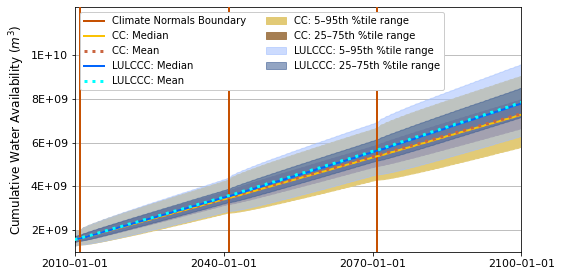

In [116]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 4.5)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinWA, MaxWA], linestyle='-', zorder=3,
           linewidth=2, color='xkcd:dark orange', label="Climate Normals Boundary")
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinWA, MaxWA], linestyle='-',
           linewidth=2, color='xkcd:dark orange', zorder=3 )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinWA, MaxWA], linestyle='-',
           linewidth=2, color='xkcd:dark orange', zorder=3 )
cc90 = ax11.fill( DTTimeList, CCWAVals90, color='xkcd:sand', alpha=1.0, 
                  label="CC: 5–95th %tile range", zorder=2)
cc50 = ax11.fill( DTTimeList, CCWAValsIQR, color='xkcd:puce', alpha=1.0, 
                  label="CC: 25–75th %tile range", zorder=2)
ax11.plot( ForTimeList, CCWatAvail_Med, linestyle='-', zorder=4,
           linewidth=2, color='xkcd:goldenrod', label='CC: Median' )
ax11.plot( ForTimeList, CCWatAvail_Ave, linestyle=':', zorder=4,
           linewidth=3, color='xkcd:terracotta', label='CC: Mean' )
ba90 = ax11.fill( DTTimeList, BAWAVals90, color='xkcd:pastel blue', alpha=0.55, 
                  label="LULCCC: 5–95th %tile range", zorder=2 )
ba50 = ax11.fill( DTTimeList, BAWAValsIQR, color='xkcd:denim blue', alpha=0.55, 
                  label="LULCCC: 25–75th %tile range", zorder=2 )
ax11.plot( ForTimeList, BAWatAvail_Med, linestyle='-', zorder=4,
           linewidth=2, color='xkcd:bright blue', label='LULCCC: Median' )
ax11.plot( ForTimeList, BAWatAvail_Ave, linestyle=':', zorder=4,
           linewidth=3, color='xkcd:cyan', label='LULCCC: Mean' )
ax11.set_xticks( [ dt.datetime(2010, 1, 1), dt.datetime(2040, 1, 1), dt.datetime(2070, 1, 1),
                  dt.datetime(2100, 1, 1) ] )
ax11.set_xlim( (dt.datetime(2010, 1, 1), dt.datetime(2100, 1, 1)))
#ax11.set_yscale('log')
ax11.set_yticks( waTicks )
ax11.set_ylim( (MinWA, MaxWA) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Cumulative Water Availability ($m^{3}$)', fontsize=12 )
ax11.legend( loc='upper left', fontsize=10, framealpha=1.0, ncol=2 )
ax11.tick_params(axis='both', which='major', labelsize=11 )
ax11.tick_params(axis='x', which='major' )
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0E}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y–%m–%d") )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )